<a href="https://colab.research.google.com/github/ashi-agrawal-06/diabetes-prediction-ml/blob/main/diabetes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df=pd.read_csv('diabetes.csv')

In [ ]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:


df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Pregnancies                 768 non-null int64
Glucose                     768 non-null int64
BloodPressure               768 non-null int64
SkinThickness               768 non-null int64
Insulin                     768 non-null int64
BMI                         768 non-null float64
DiabetesPedigreeFunction    768 non-null float64
Age                         768 non-null int64
Outcome                     768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
df.corrwith(df["Outcome"])

Pregnancies                 0.221898
Glucose                     0.466581
BloodPressure               0.065068
SkinThickness               0.074752
Insulin                     0.130548
BMI                         0.292695
DiabetesPedigreeFunction    0.173844
Age                         0.238356
Outcome                     1.000000
dtype: float64

In [ ]:
X=df.iloc[:,:-1].values
Y=df.iloc[:,-1].values

In [ ]:
X1=df.iloc[:,[0,1,5,7]].values

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
s1=StandardScaler()
s2=StandardScaler()
s3=StandardScaler()
s4=StandardScaler()
s5=StandardScaler()
s6=StandardScaler()
s7=StandardScaler()
s8=StandardScaler()


In [ ]:
X[:,0:1]=s1.fit_transform(X[:,0:1])
X[:,1:2]=s2.fit_transform(X[:,1:2])#2
X[:,2:3]=s3.fit_transform(X[:,2:3])#3
X[:,3:4]=s4.fit_transform(X[:,3:4])#4
X[:,4:5]=s5.fit_transform(X[:,4:5])#5
X[:,5:6]=s6.fit_transform(X[:,5:6])#6
X[:,6:7]=s7.fit_transform(X[:,6:7])#7
X[:,7:8]=s8.fit_transform(X[:,7:8])

In [ ]:
X

array([[ 0.63994726,  0.84832379,  0.14964075, ...,  0.46849198,
         1.4259954 ,  1.4259954 ],
       [-0.84488505, -1.12339636, -0.16054575, ..., -0.36506078,
        -0.19067191, -0.19067191],
       [ 1.23388019,  1.94372388, -0.26394125, ...,  0.60439732,
        -0.10558415, -0.10558415],
       ...,
       [ 0.3429808 ,  0.00330087,  0.14964075, ..., -0.68519336,
        -0.27575966, -0.27575966],
       [-0.84488505,  0.1597866 , -0.47073225, ..., -0.37110101,
         1.17073215,  1.17073215],
       [-0.84488505, -0.8730192 ,  0.04624525, ..., -0.47378505,
        -0.87137393, -0.87137393]])

In [ ]:
#logistic regression

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
Xtrain,Xtest,Ytrain,Ytest=train_test_split(X,Y,test_size=0.2,random_state=0)

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
logreg=LogisticRegression(solver="lbfgs")

In [ ]:
logreg.fit(Xtrain,Ytrain)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
logreg.score(Xtest,Ytest)*100

81.81818181818183

In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
ypred=logreg.predict(Xtest)
confusion_matrix(ypred,Ytest)

array([[97, 18],
       [10, 29]])

Text(0.5, 1.0, ' LOGISTIC REGRESSION best 81.81%')

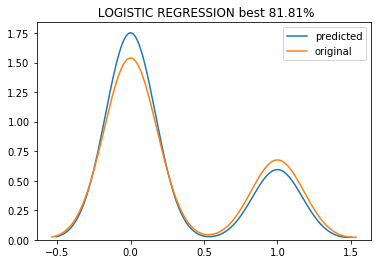

In [ ]:
sns.distplot(ypred,hist=False,label="predicted")
sns.distplot(Ytest,hist=False,label="original")
plt.title(' LOGISTIC REGRESSION best 81.81%')

In [ ]:
#Visualising the training set results
from matplotlib.colors import ListedColormap
def fun(X,Y,classifier,modelname,colors=("red","green")):
    plt.figure(figsize=(10,6))
    X_set,Y_Set=Xtrain,Ytrain
    col1=np.arange(start=X_set[:,0].min()-1,stop=X_set[:,0].max()+1,step=0.5)
    col2=np.arange(start=X_set[:,1].min()-1,stop=X_set[:,1].max()+1,step=0.5)
    X1,X2=np.meshgrid(col1,col2)
    plt.contourf(X1,X2,classifier.predict(np.array([X1.ravel(),
                                                   X2.ravel()]).T)
                                          .reshape(X1.shape),
    alpha=0.75,cmap=ListedColormap(('yellow','green')))
    plt.xlim(X1.min(),X1.max())
    plt.ylim(X2.min(),X2.max())
    for i,j in enumerate(np.unique(Y_Set)):
        plt.scatter(X_set[Y_Set==j,0],X_set[Y_Set==j,1],
          c=ListedColormap((colors))(i),label=j)
    plt.title(modelname)
    plt.xlabel('X')
    plt.ylabel('Outcome')
    plt.legend()
    plt.show()

In [ ]:
fun(Xtrain,Ytrain,logreg,"Logistic Regression")

ValueError: ignored

<Figure size 720x432 with 0 Axes>

In [ ]:
r1=StandardScaler()
r2=StandardScaler()
r3=StandardScaler()
r4=StandardScaler()


X1[:,0:1]=r1.fit_transform(X1[:,0:1])
X1[:,1:2]=r2.fit_transform(X1[:,1:2])#2
X1[:,2:3]=r3.fit_transform(X1[:,2:3])#3
X1[:,3:4]=r4.fit_transform(X1[:,3:4])#4

In [ ]:
xtrain,xtest,ytrain,ytest=train_test_split(X1,Y,test_size=0.2,random_state=0)

In [ ]:
logreg2=LogisticRegression(solver="lbfgs")
logreg2.fit(xtrain,ytrain)
logreg2.score(xtest,ytest)*100

80.51948051948052

In [ ]:
#SVM

In [ ]:
from sklearn.svm import SVC

In [ ]:
model=SVC(kernel='rbf')

In [ ]:
model.fit(Xtrain,Ytrain)

/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [ ]:
model.score(Xtest,Ytest)*100

81.16883116883116

In [ ]:
ypred=model.predict(Xtest)
confusion_matrix(ypred,Ytest)

array([[91, 18],
       [ 8, 37]])

Text(0.5, 1.0, 'SVC kernel =rbf 81.16%')

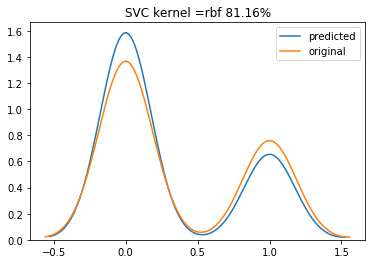

In [ ]:
sns.distplot(ypred,hist=False,label="predicted")
sns.distplot(Ytest,hist=False,label="original")
plt.title('SVC kernel =rbf 81.16%')

In [ ]:
model1=SVC(kernel='linear')
model1.fit(Xtrain,Ytrain)
model1.score(Xtest,Ytest)*100

81.81818181818183

In [ ]:
model2=SVC(kernel='poly')
model2.fit(Xtrain,Ytrain)
model2.score(Xtest,Ytest)*100

/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


75.97402597402598

In [ ]:
model3=SVC(kernel='sigmoid',gamma='auto')
model3.fit(Xtrain,Ytrain)
model3.score(Xtest,Ytest)*100

74.67532467532467

In [ ]:
#KNN

In [ ]:
Xtrain,Xtest,Ytrain,Ytest=train_test_split(X,Y,test_size=0.2,random_state=1)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
knn=KNeighborsClassifier()

In [ ]:
knn.fit(Xtrain,Ytrain)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [ ]:
knn.score(Xtest,Ytest)*100

79.22077922077922

In [ ]:
ypred=knn.predict(Xtest)
confusion_matrix(ypred,Ytest)


array([[89, 22],
       [10, 33]])

Text(0.5, 1.0, 'KNN 79.22%')

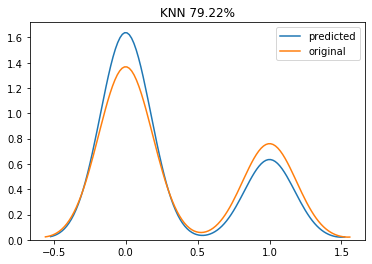

In [ ]:
sns.distplot(ypred,hist=False,label="predicted")
sns.distplot(Ytest,hist=False,label="original")
plt.title('KNN 79.22%')

In [ ]:
#bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB

In [ ]:
bayes=GaussianNB()

In [ ]:
bayes.fit(Xtrain,Ytrain)
bayes.score(Xtest,Ytest)*100

77.92207792207793

In [ ]:
ypred=bayes.predict(Xtest)
confusion_matrix(ypred,Ytest)

array([[84, 19],
       [15, 36]])

Text(0.5, 1.0, 'NAIVE BAYES 77.92%')

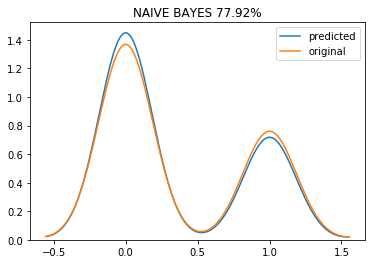

In [ ]:
sns.distplot(ypred,hist=False,label="predicted")
sns.distplot(Ytest,hist=False,label="original")
plt.title('NAIVE BAYES 77.92%')